In [19]:
import pandas as pd
import shapefile
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize

import geopandas as gpd
from scipy.spatial import cKDTree
import numpy as np
from numpy import *
import cartopy.crs as ccrs  # Cartopy for projections
from netCDF4 import *

In [20]:
df = pd.read_csv('E:\Projects\LEARNING-\data_visualisation\ibtracs-2000.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\titbo\AppData\Local\Temp\ipykernel_5896\1108009534.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('E:\Projects\LEARNING-\data_visualisation\ibtracs-2000.csv')
C:\Users\titbo\AppData\Local\Temp\ipykernel_5896\1108009534.py:1: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E:\Projects\LEARNING-\data_visualisation\ibtracs-2000.csv')


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 06:00:00,TS,19.6000,-94.6000,...,,,,,,,,,1,344
2,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 09:00:00,TS,19.6500,-94.6000,...,,,,,,,,,1,0
3,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 12:00:00,TS,19.7000,-94.6000,...,,,,,,,,,1,344
4,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 15:00:00,TS,19.7575,-94.6500,...,,,,,,,,,1,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 00:00:00,TS,-18.5,54.2,...,,,,,,,,,9,211
8929,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 03:00:00,TS,-18.9258,53.9683,...,,,,,,,,,10,205
8930,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 06:00:00,TS,-19.3667,53.7667,...,,,,,,,,,9,202
8931,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 09:00:00,TS,-19.7741,53.6115,...,,,,,,,,,9,199


In [24]:
# Convert 'ISO_TIME' to datetime, coercing errors to NaT (Not a Time)
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

# Filter for season 2000 and remove rows with invalid dates
filtered_df = df[df['SEASON'] == 2000]
filtered_df = filtered_df.dropna(subset=['ISO_TIME'])  # Drop rows where 'ISO_TIME' is NaT

# Sort by 'ISO_TIME' and get the first occurrence of each day
filtered_df = filtered_df.sort_values('ISO_TIME').groupby(filtered_df['ISO_TIME'].dt.date).first().reset_index(drop=True)

# Show the result
print(filtered_df.head())

             SID SEASON NUMBER BASIN SUBBASIN       NAME   ISO_TIME NATURE  \
0  2000099S28037   2000     24    SI       MM  NOT_NAMED 2000-04-10     SS   
1  2000099S28037   2000     24    SI       MM  NOT_NAMED 2000-04-11     SS   
2  2000099S28037   2000     24    SI       MM  NOT_NAMED 2000-04-12     SS   
3  2000103S10095   2000     26    SI       MM  INNOCENTE 2000-04-13     TS   
4  2000103S10095   2000     26    SI       MM  INNOCENTE 2000-04-14     TS   

    LAT   LON  ... BOM_GUST_PER REUNION_GUST REUNION_GUST_PER USA_SEAHGT  \
0 -25.3  37.5  ...                                                         
1 -23.8  37.0  ...                                                         
2 -23.5  36.0  ...                                                         
3 -11.3  88.2  ...                                                         
4 -11.1  84.9  ...                                                         

  USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW USA_SEARAD_NW STORM_SPEED  \
0

C:\Users\titbo\AppData\Local\Temp\ipykernel_5896\1490298243.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')


In [25]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

# Drop rows where 'iso_time' could not be parsed (NaT values)
df = df.dropna(subset=['ISO_TIME'])

# Filter for season 2000 and get the first occurrence of each day
filtered_df = df[df['SEASON'] == 2000]
filtered_df = filtered_df.sort_values('ISO_TIME').groupby(df['ISO_TIME'].dt.to_period('M')).first().reset_index(drop=True)
filtered_df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,2000099S28037,2000,24,SI,MM,NOT_NAMED,2000-04-10 00:00:00,SS,-25.3,37.5,...,,,,,,,,,5,58
1,2000125N06136,2000,29,WP,MM,DAMREY,2000-05-03 18:00:00,TS,6.2,135.7,...,,,,,,,,,12,344
2,2000150N11117,2000,35,WP,MM,NOT_NAMED,2000-06-01 00:00:00,TS,16.15,108.9,...,,,,,,,,,10,316
3,2000184N13133,2000,41,WP,MM,KIROGI,2000-07-02 00:00:00,TS,13.1,133.4,...,,,,,,,,,6,321
4,2000205N10260,2000,50,EP,CP,DANIEL,2000-08-01 00:00:00,TS,21.825,-154.5,...,,,,,,,,,8,308
5,2000244N13229,2000,74,EP,MM,KRISTY,2000-09-01 00:00:00,TS,13.7,-133.2,...,,,,,,,,,2,336
6,2000273N16277,2000,91,EP,CS,KEITH,2000-10-01 00:00:00,TS,17.9,-86.9,...,,,,,,,,,2,270
7,2000305N06136,2000,103,WP,MM,BEBINCA,2000-11-01 00:00:00,TS,10.575,129.1,...,,,,,,,,,11,308
8,2000331N09092,2000,107,NI,AS,NOT_NAMED,2000-12-01 00:00:00,TS,11.5,75.1,...,,,,,,,,,6,274
9,2000364N07130,2000,113,WP,MM,SOULIK,2001-01-01 00:00:00,TS,14.8,131.625,...,,,,,,,,,10,66


In [236]:
!pip install geopy

<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\titbo\AppData\Local\Temp\ipykernel_5896\1826450104.py:10: SyntaxWarning: invalid escape sequence '\P'
  data_path = "E:\Projects\LEARNING-\data_visualisation\ibtracs-2000.csv"  # Update this with your file path
C:\Users\titbo\AppData\Local\Temp\ipykernel_5896\1826450104.py:11: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)
C:\Users\titbo\AppData\Local\Temp\ipykernel_5896\1826450104.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')


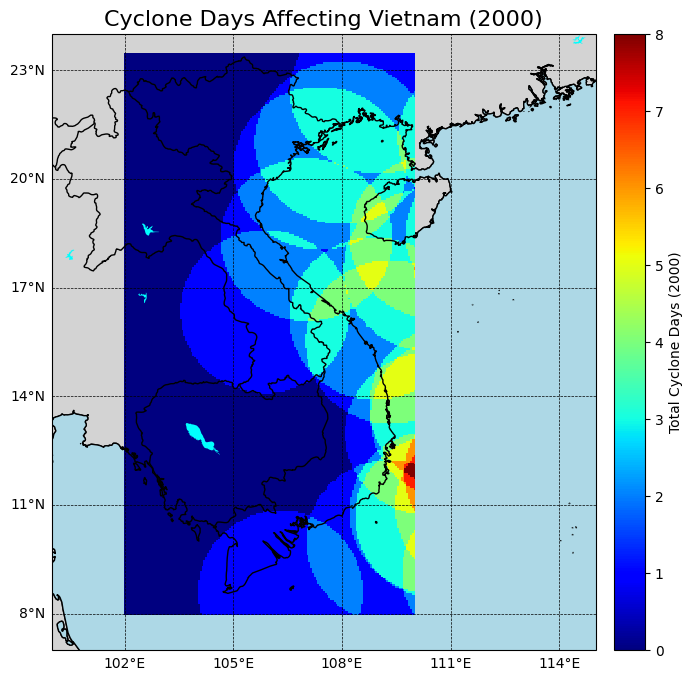

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import radians, sin, cos, sqrt, atan2
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FixedLocator
# Step 1: Load and Clean Data
data_path = "E:\Projects\LEARNING-\data_visualisation\ibtracs-2000.csv"  # Update this with your file path
df = pd.read_csv(data_path)

# Convert LAT, LON, and ISO_TIME to appropriate types
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

# Filter valid rows and drop NaNs
df = df.dropna(subset=['LAT', 'LON', 'ISO_TIME'])

# Step 2: Filter Cyclones for Vietnam in 2000
# Vietnam boundaries
vietnam_lat_min, vietnam_lat_max = 8, 23
vietnam_lon_min, vietnam_lon_max = 102, 114

filtered_df = df[
    (df['LAT'] >= vietnam_lat_min) & 
    (df['LAT'] <= vietnam_lat_max) & 
    (df['LON'] >= vietnam_lon_min) & 
    (df['LON'] <= vietnam_lon_max) & 
    (df['ISO_TIME'].dt.year == 2000)
]

# Keep only the first storm record per day
filtered_df = filtered_df.sort_values('ISO_TIME').groupby(filtered_df['ISO_TIME'].dt.date).first()

# Step 3: Define the Haversine Formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Step 4: Create Grid for Vietnam
latitudes = np.arange(8, 23 + 0.5, 0.05)  # Defined lat range
longitudes = np.arange(102, 110 + 0.05, 0.05)  # Defined lon range
lon_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)

# Step 5: Count Affected Cyclone Days
affected_count = np.zeros_like(lon_mesh, dtype=int)
radius_km = 250

for _, storm in filtered_df.iterrows():
    storm_lat, storm_lon = storm['LAT'], storm['LON']
    distances = np.vectorize(haversine)(lat_mesh, lon_mesh, storm_lat, storm_lon)
    affected_count += (distances <= radius_km).astype(int)

# Step 6: Plot the Results
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([100, 115, 7, 24], crs=ccrs.PlateCarree())

# Add background features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='aqua')

# Plot affected areas
x, y = lon_mesh, lat_mesh
heatmap = ax.pcolormesh(x, y, affected_count, cmap='jet', shading='auto', alpha=1, vmin=0, vmax =8 )

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label("Total Cyclone Days (2000)")

#gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5, color='black')
gl.xlocator = FixedLocator(np.arange(102, 115, 3))  # Longitude gridlines (adjust spacing if needed)
gl.ylocator = FixedLocator(np.arange(8, 24, 3))  # Latitude gridlines (adjust spacing if needed)
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False  # Hide labels on the top
gl.right_labels = False  # Hide labels on the right

# Add title
ax.set_title("Cyclone Days Affecting Vietnam (2000)", fontsize=16)

plt.show()
